# Exploratory Data Analysis


In [553]:
import pandas as pd
import numpy as np
import seaborn as sns


In [554]:
data = pd.read_csv("Paitients_Files_Train.csv")

In [555]:
data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [556]:
data = pd.read_csv("Paitients_Files_Train.csv",index_col = "ID")

In [557]:
data.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
ID,,,,,,,,,,
ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


## 2 . Feature selection

In [558]:
features = ["PRG","PL","PR","SK","TS","M11","BD2","Age"]

### Splitting dataset into X and Y

In [559]:
X = data[features]
y = data["Sepssis"]

In [560]:
X.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
ID,,,,,,,,
ICU200010,6,148,72,35,0,33.6,0.627,50
ICU200011,1,85,66,29,0,26.6,0.351,31
ICU200012,8,183,64,0,0,23.3,0.672,32
ICU200013,1,89,66,23,94,28.1,0.167,21
ICU200014,0,137,40,35,168,43.1,2.288,33


In [561]:
y.head()

ID
ICU200010    Positive
ICU200011    Negative
ICU200012    Positive
ICU200013    Negative
ICU200014    Positive
Name: Sepssis, dtype: object

# 3. Exploratory data analysis

In [562]:
corelation = X.corr()

<AxesSubplot:>

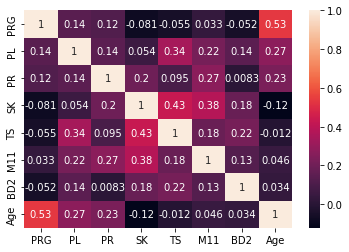

In [563]:
sns.heatmap(corelation, xticklabels = corelation.columns , yticklabels=corelation.columns,annot=True)

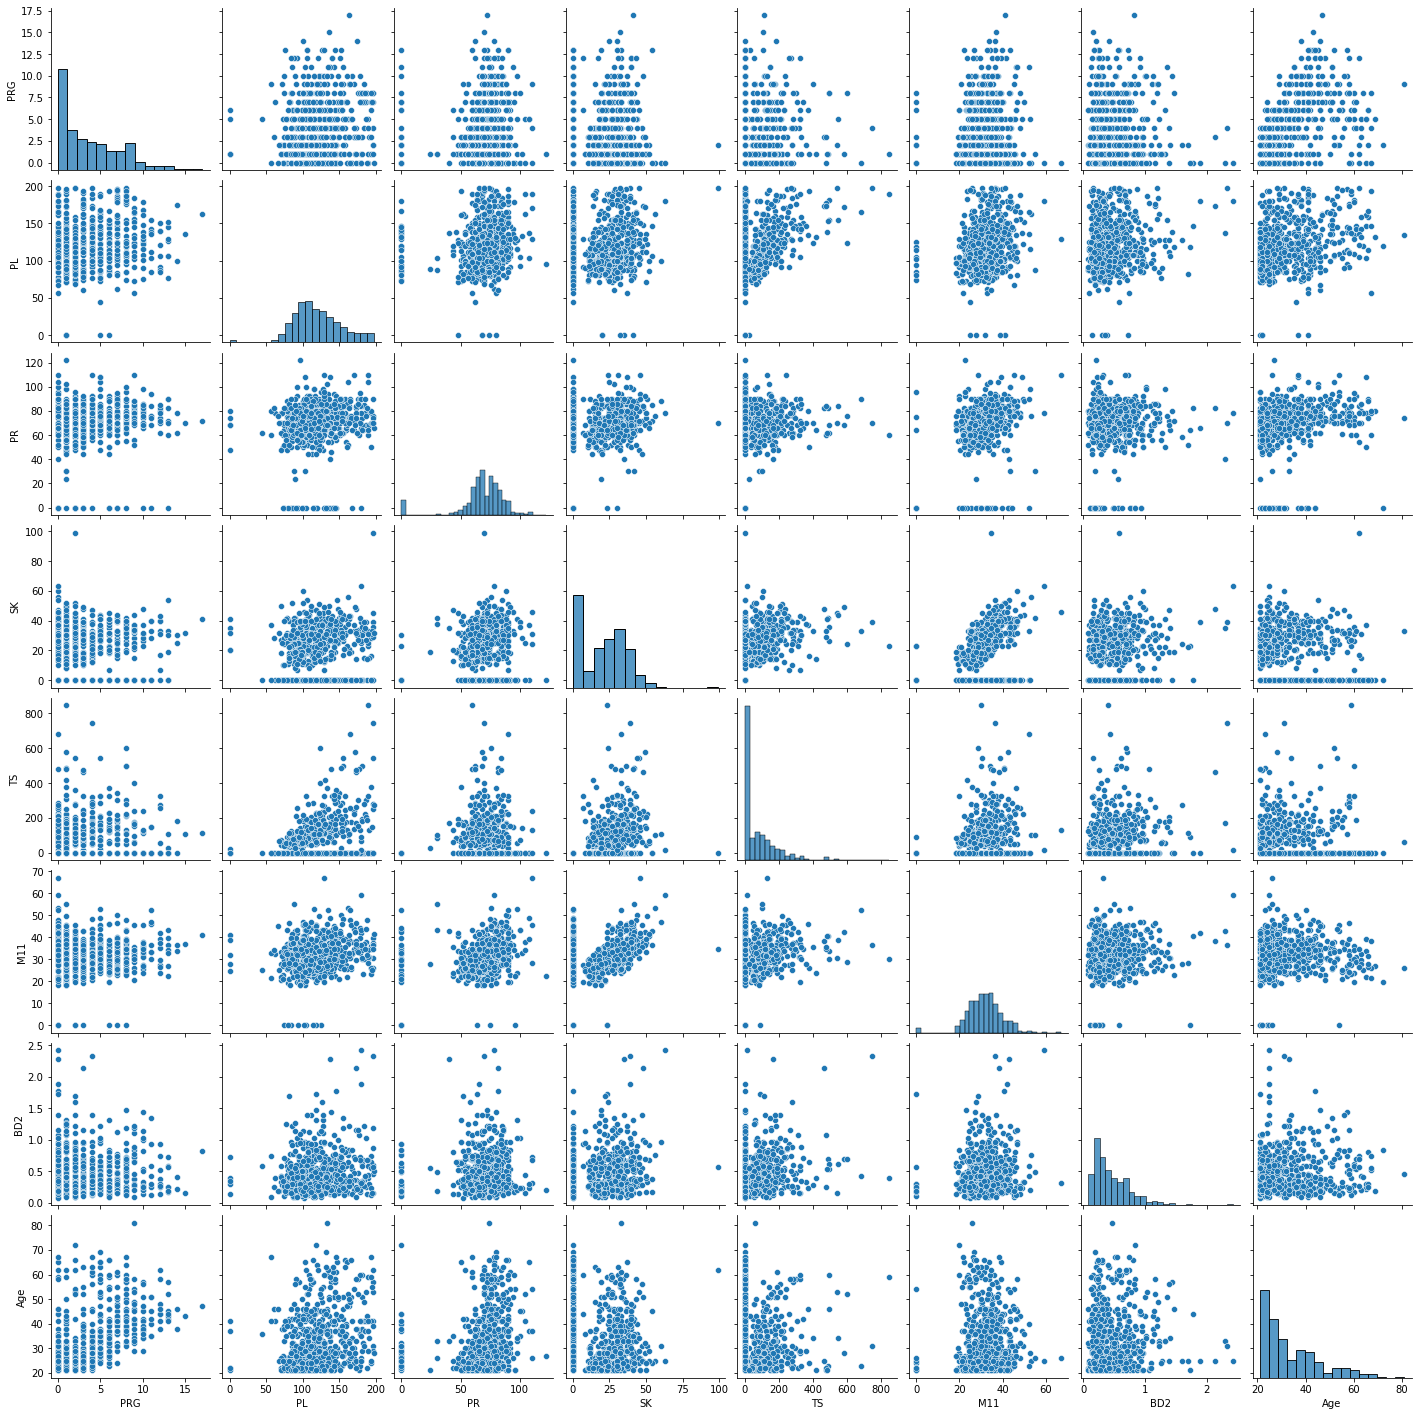

In [564]:
sns.pairplot(X)

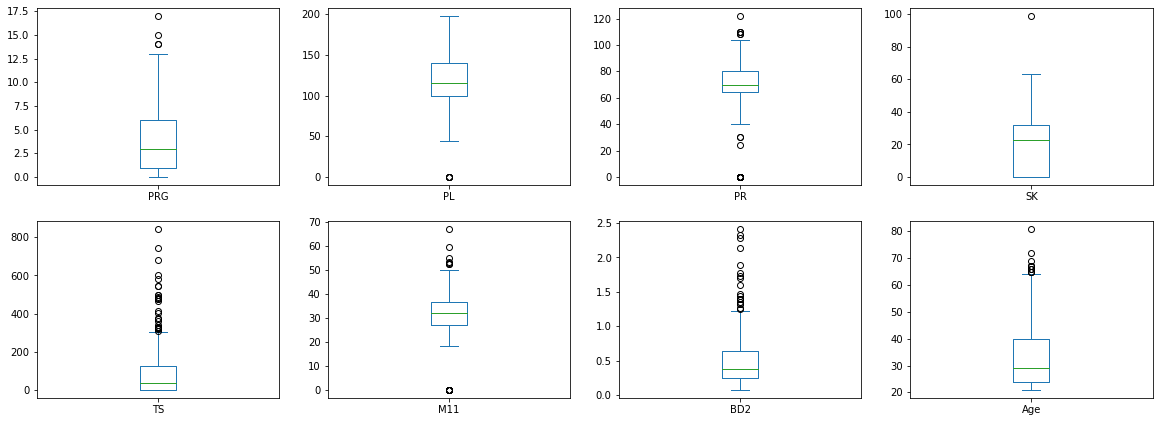

In [565]:
plt.rcParams["figure.figsize"] = (20,15)
X.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

In [566]:
X.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# Histogram of each columns

<AxesSubplot:xlabel='PRG', ylabel='Count'>

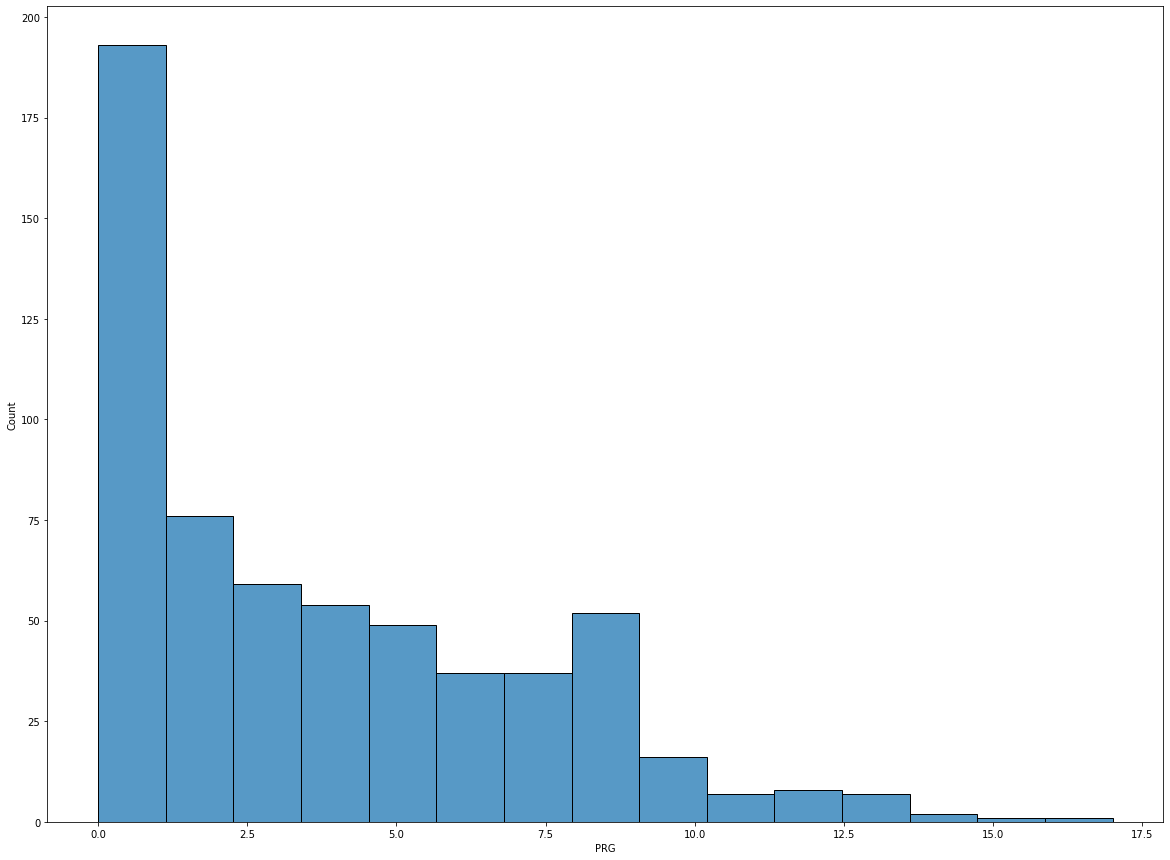

In [567]:
sns.histplot(X,x='PRG')


<AxesSubplot:xlabel='PL', ylabel='Count'>

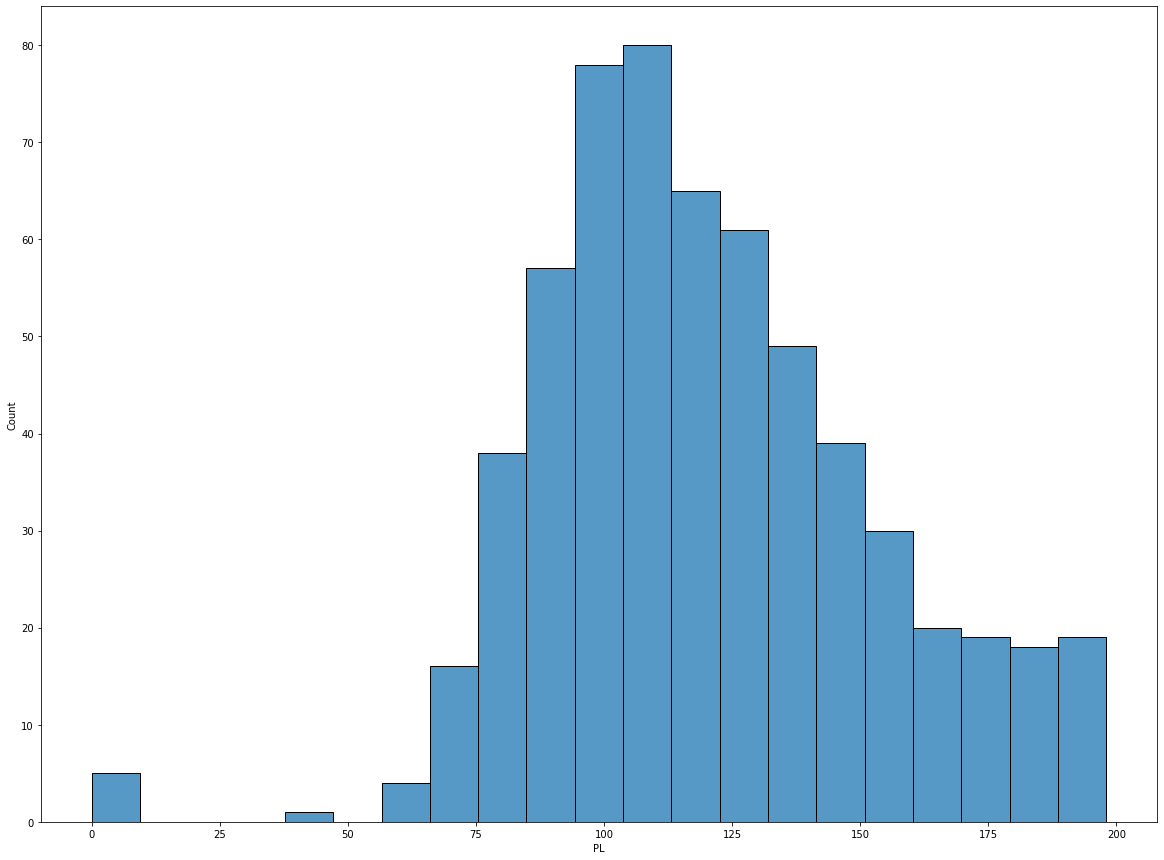

In [568]:
sns.histplot(X,x='PL')

<AxesSubplot:xlabel='PR', ylabel='Count'>

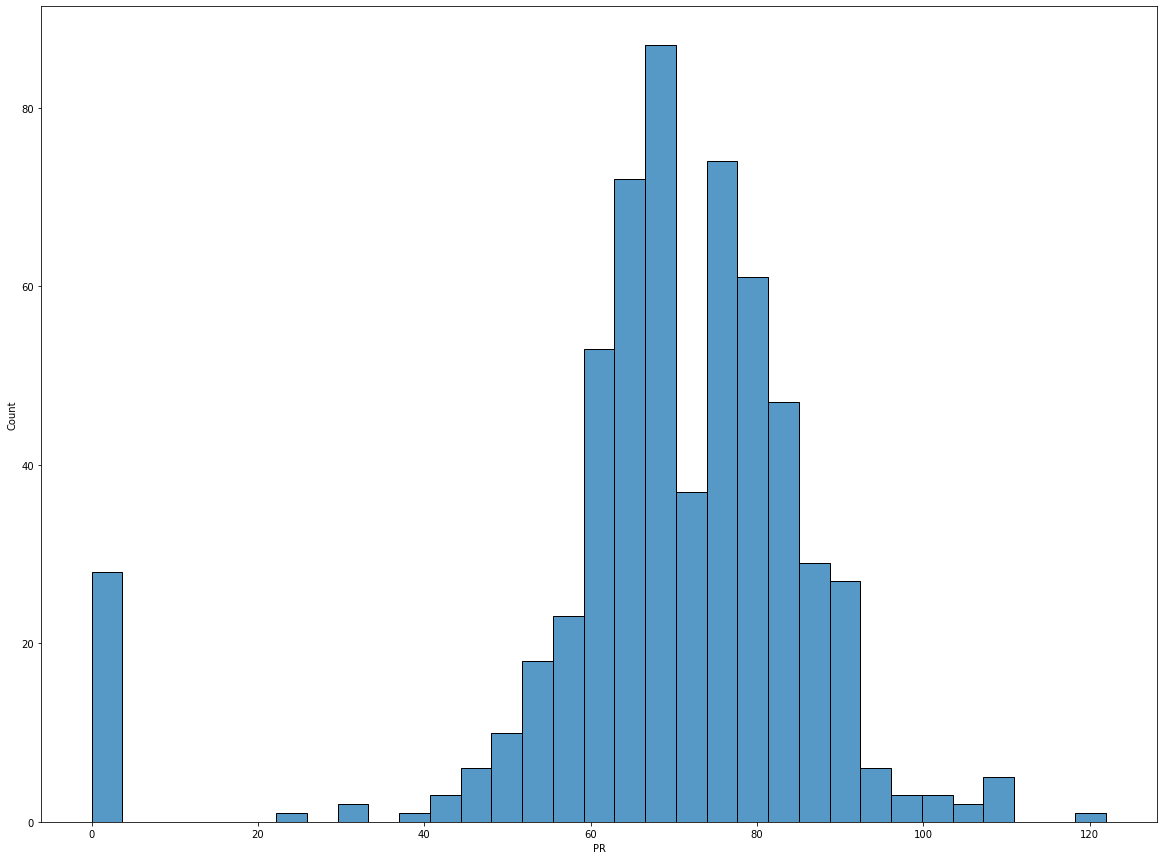

In [569]:
sns.histplot(X,x='PR')


<AxesSubplot:xlabel='SK', ylabel='Count'>

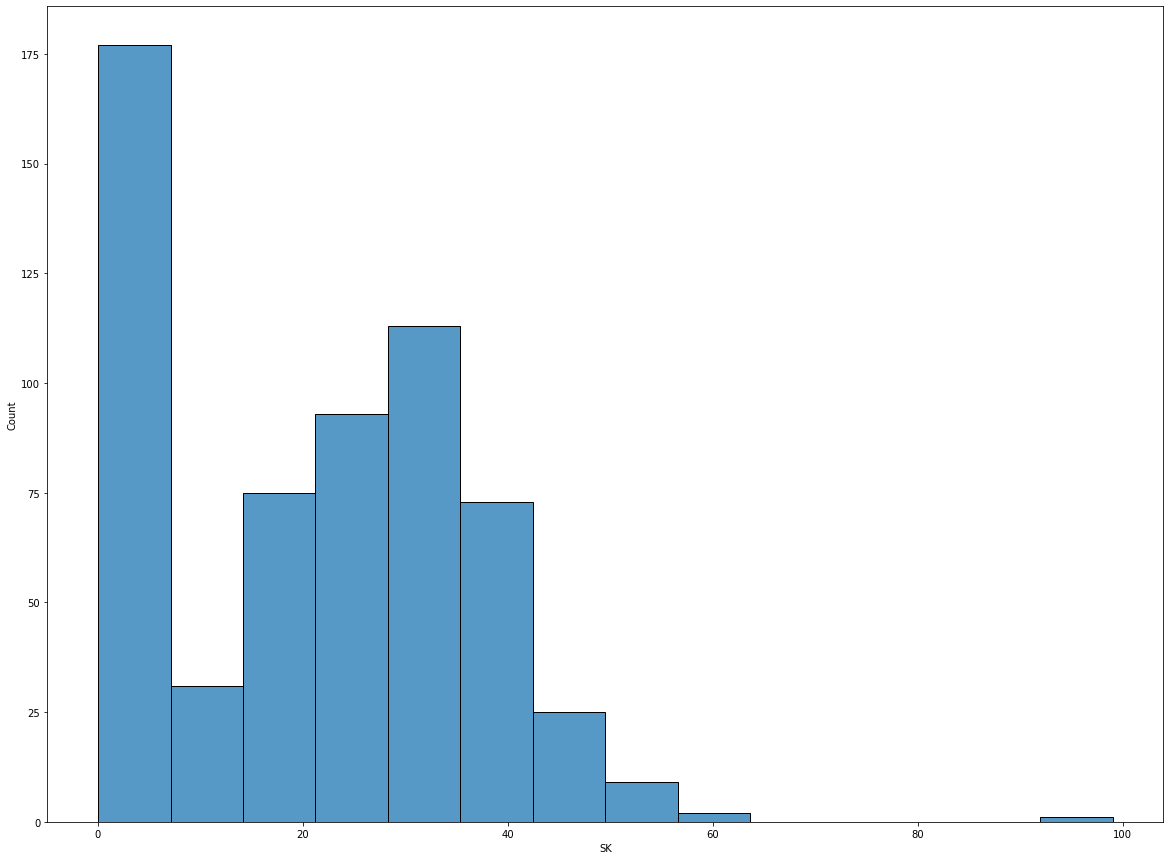

In [570]:
sns.histplot(X,x='SK')


<AxesSubplot:xlabel='TS', ylabel='Count'>

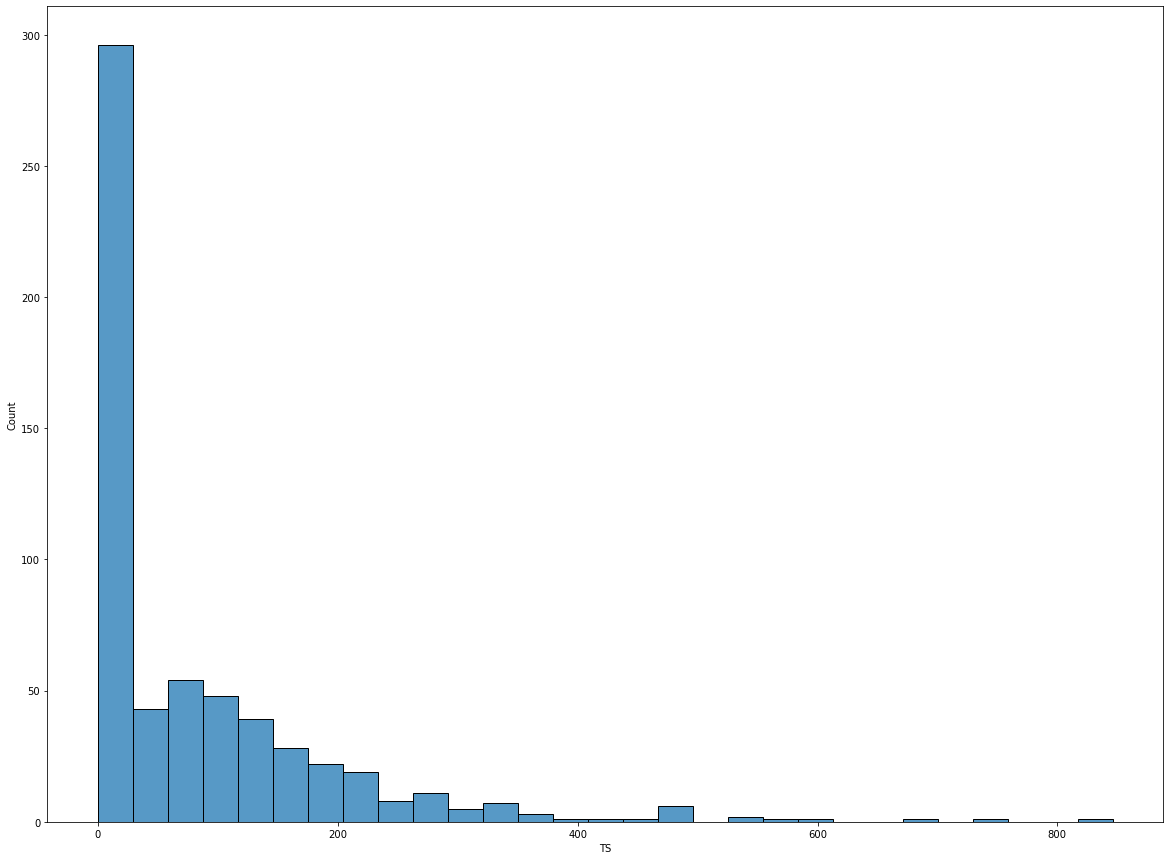

In [571]:
sns.histplot(X,x='TS')


<AxesSubplot:xlabel='M11', ylabel='Count'>

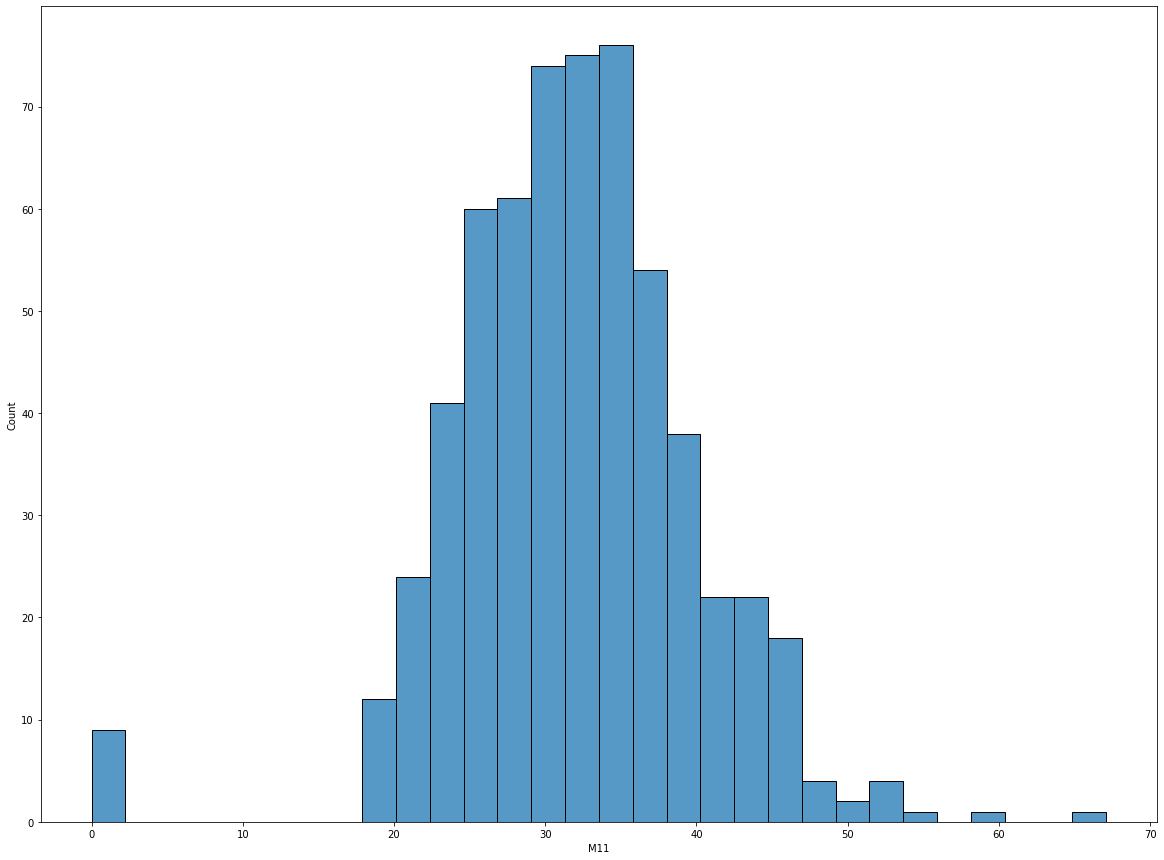

In [572]:
sns.histplot(X,x='M11')


<AxesSubplot:xlabel='BD2', ylabel='Count'>

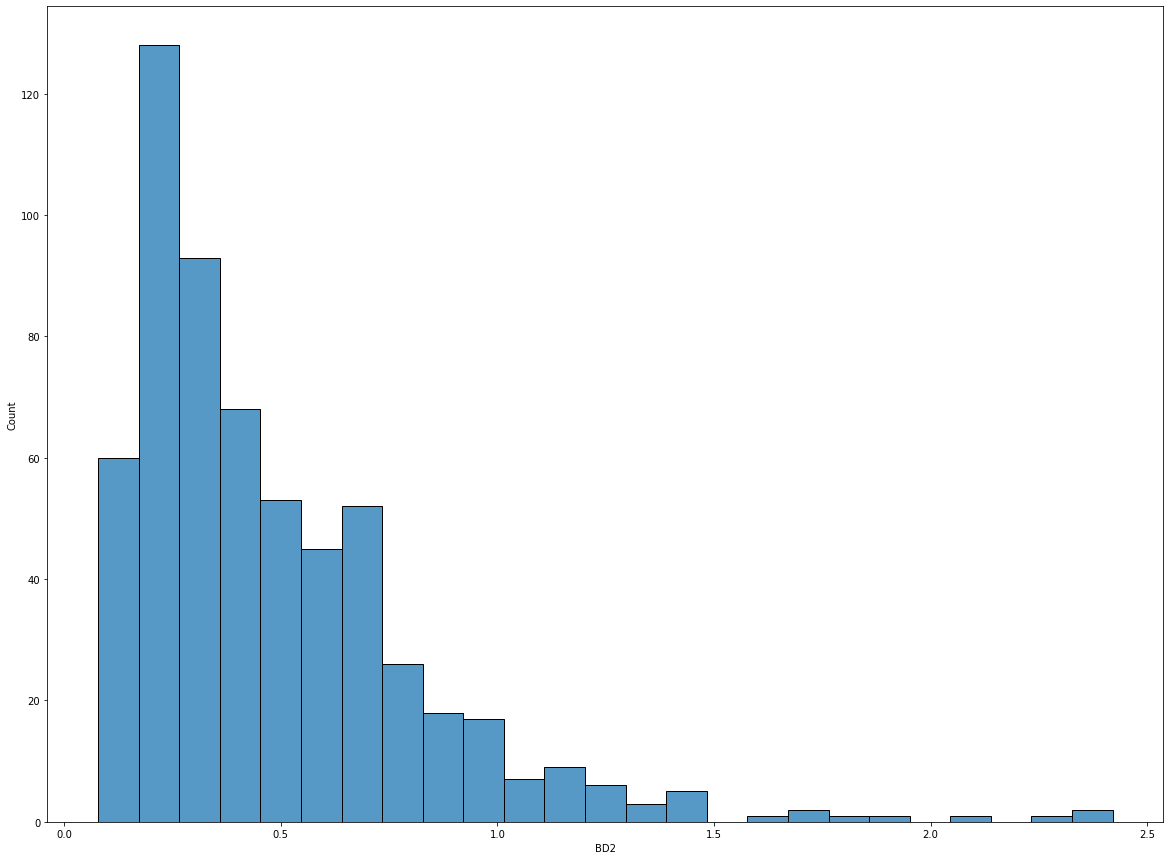

In [573]:
sns.histplot(X,x='BD2')

### X,y -> X_Train, y_train, X_valid, y_valid

In [574]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train ,y_test = train_test_split(X,y , train_size = 0.8 , test_size = 0.2 , random_state=0)

In [575]:
X_train.shape


(479, 8)

In [576]:
X.shape

(599, 8)

In [577]:
data.shape

(599, 10)

# 4. Traning Machine Learning Model

In [578]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
)


In [579]:
lr_model.fit(X_train,y_train)

LogisticRegression(intercept_scaling=10000.0, max_iter=1000000, penalty='l1',
                   solver='liblinear', tol=1e-06, warm_start=True)

In [580]:
print('Test Accuracy:',lr_model.score(X_test,y_test))
print('Train Accuracy:',lr_model.score(X_train,y_train))

Test Accuracy: 0.7833333333333333
Train Accuracy: 0.7828810020876826


In [581]:
y_preds = lr_model.predict(X_test)
y_pred_train = lr_model.predict(X_train)

In [582]:
y_preds

array(['Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negati

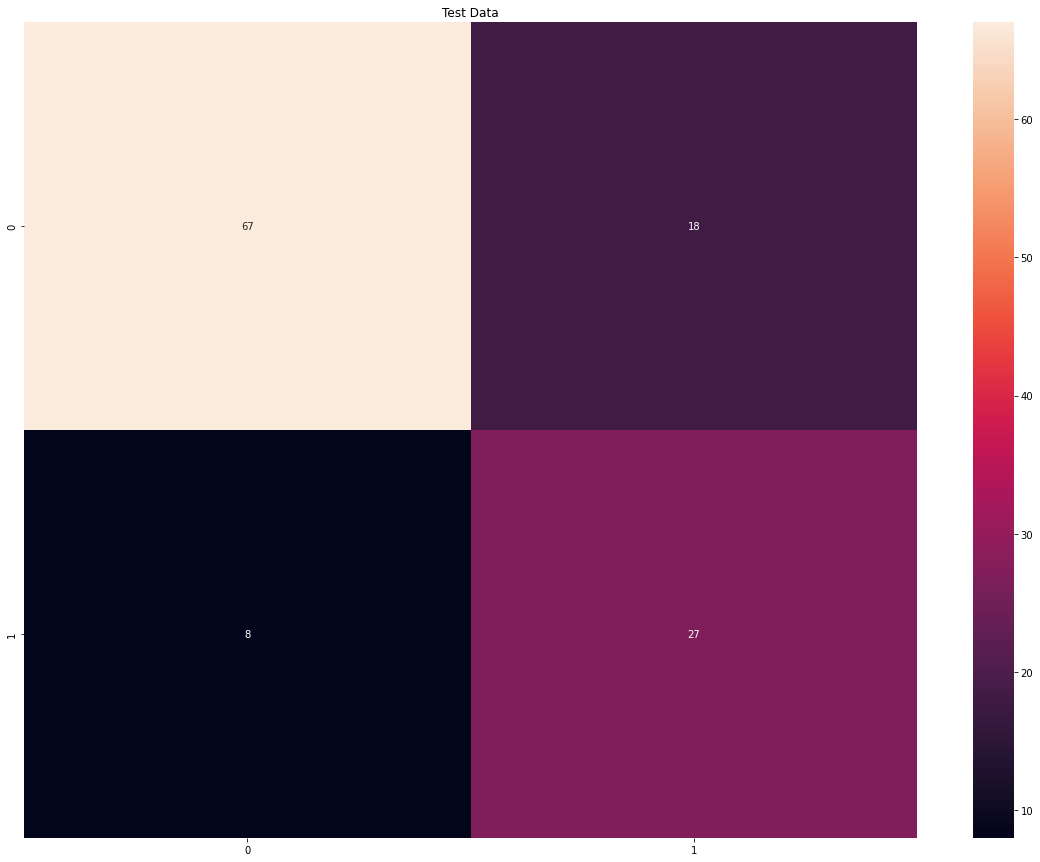

In [583]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
test = confusion_matrix(y_preds,y_test)
plt.title('Test Data')
sns.heatmap(data=test,annot=True,fmt='g')
plt.show()

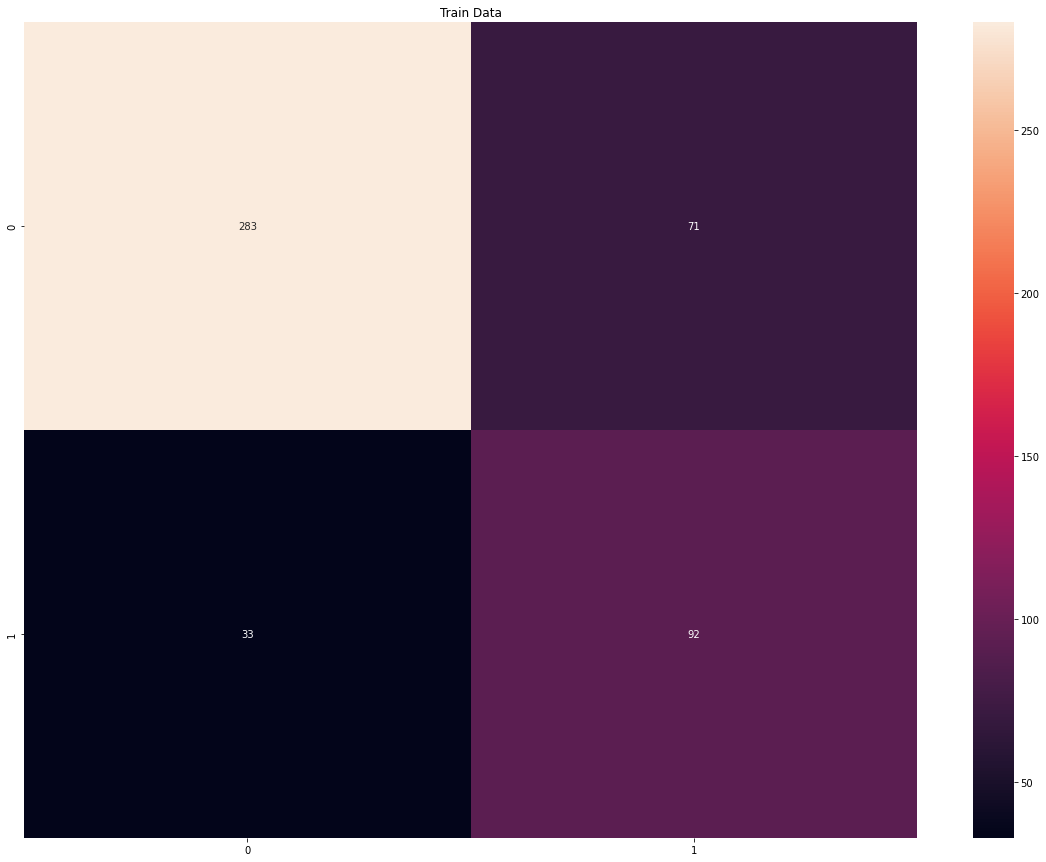

In [584]:
train = confusion_matrix(y_pred_train,y_train)
plt.title('Train Data')
sns.heatmap(data=train,annot=True,fmt='g')
plt.show()

## Decision Trees 

In [585]:
from sklearn import tree
# old method
# decision_tree = tree.DecisionTreeClassifier(splitter='best',
#                                        max_depth=6 ,criterion="gini")
decision_tree = tree.DecisionTreeClassifier(splitter='random',
                                       max_depth=6 ,criterion="entropy")
decision_tree = decision_tree.fit(X_train, y_train)

In [586]:
print('Test Accuracy:',decision_tree.score(X_test,y_test))
print('Train Accuracy:',decision_tree.score(X_train,y_train))

Test Accuracy: 0.7083333333333334
Train Accuracy: 0.8079331941544885


In [587]:
y_preds = decision_tree.predict(X_test)
y_pred_train = decision_tree.predict(X_train)

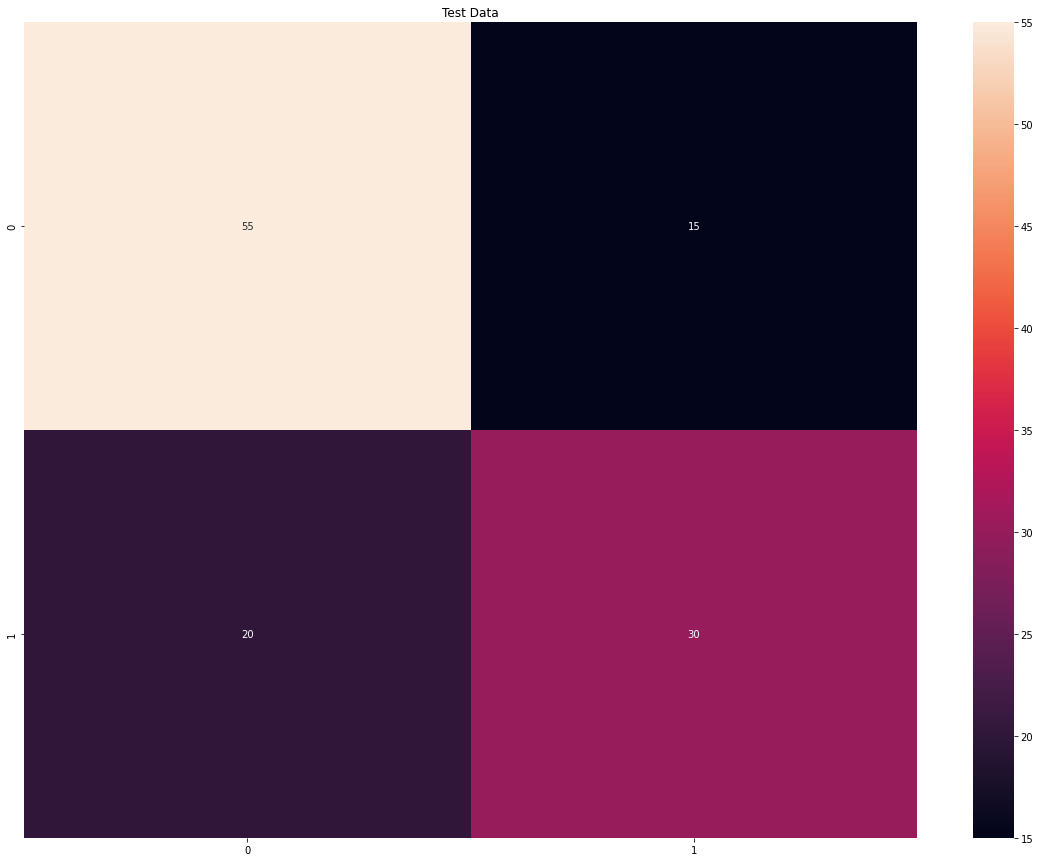

In [588]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
test = confusion_matrix(y_preds,y_test)
plt.title('Test Data')
sns.heatmap(data=test,annot=True,fmt='g')
plt.show()